C:\Users\aneek\AppData\Local\Temp\ipykernel_12100\2220944319.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['P1']=(d2['Price']-d2['Price'].mean())/d2['Price'].std()
C:\Users\aneek\AppData\Local\Temp\ipykernel_12100\2220944319.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['P2']=d2['P1']*d2['P1']
C:\Users\aneek\AppData\Local\Temp\ipykernel_12100\2220944319.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Beta0: -0.271904
Beta1: -0.187831
Beta2: 0.278536


C:\Users\aneek\AppData\Local\Temp\ipykernel_12100\2220944319.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['P1']=(d3['Price']-d3['Price'].mean())/d3['Price'].std()
C:\Users\aneek\AppData\Local\Temp\ipykernel_12100\2220944319.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['P2']=d3['P1']*d3['P1']
C:\Users\aneek\AppData\Local\Temp\ipykernel_12100\2220944319.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

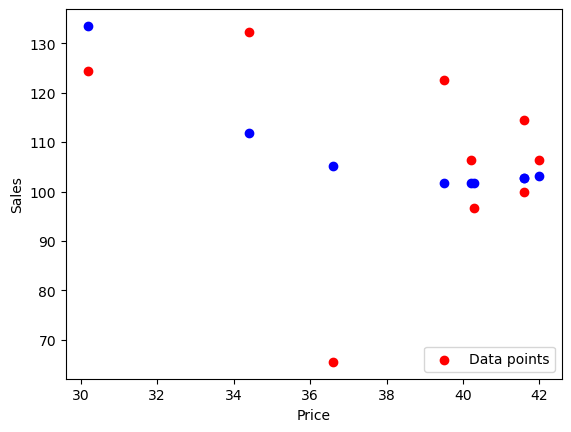

RMSE: 17.396843630292334
30.2
42.0
65.5
132.2
101.65209872037927
133.5218631311419


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 14 18:44:12 2025

@author: aneek
"""

import numpy as np
import os
#plot autocorrelation function
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_column',None)
file_p='C:\\Users\\aneek\\My Drive\\data\\cig3.xlsx'
d1=pd.read_excel(file_p)
d2=d1.loc[:41]
d3=d1.loc[42:]
#d2['Price_S']=d2['Price']*d2['Price']
l1=len(d2)
d2['P1']=(d2['Price']-d2['Price'].mean())/d2['Price'].std()
d2['P2']=d2['P1']*d2['P1']
d2['S1']=(d2['Sales']-d2['Sales'].mean())/d2['Sales'].std()
def RS1(X1,tha):
    l2=len(X1)
    t1=0
    for j in range(0,l2):
        t1=t1+((tha[0]*X1.iloc[j]['cnst']+tha[1]*X1.iloc[j]['P1']+tha[2]*X1.iloc[j]['P2']-X1.iloc[j]['S1'])**2)
    t1=0.5*t1
    return t1
def cn_th(X1,ta0): #update
    nat=np.array([0.0,0.0,0.0])
    l2=len(X1)
    t1=0
    for j in range(0,l2):
        t1=t1+((ta0[0]*X1.iloc[j]['cnst']+ta0[1]*X1.iloc[j]['P1']+ta0[2]*X1.iloc[j]['P2']-X1.iloc[j]['S1'])*X1.iloc[j]['cnst'])
    nat[0]=ta0[0]-(0.01*t1)
    t1=0
    for j in range(0,l2):
        t1=t1+((ta0[0]*X1.iloc[j]['cnst']+ta0[1]*X1.iloc[j]['P1']+ta0[2]*X1.iloc[j]['P2']-X1.iloc[j]['S1'])*X1.iloc[j]['P1'])
    nat[1]=ta0[1]-(0.01*t1)
    t1=0
    for j in range(0,l2):
        t1=t1+((ta0[0]*X1.iloc[j]['cnst']+ta0[1]*X1.iloc[j]['P1']+ta0[2]*X1.iloc[j]['P2']-X1.iloc[j]['S1'])*X1.iloc[j]['P2'])
    nat[2]=ta0[2]-(0.01*t1)
    return nat
th0=np.array([0.0,0.0,0.0])
dx1=RS1(d2,th0) #dx1 stores the initial RSS
ch1=[]
chk1=0.5
iter=0
th_X=np.array([0.0,0.0,0.0])
while (iter<5000 and chk1>0.000000000000001):
        iter=iter+1
        th_X=cn_th(d2,th0)
        dx2=RS1(d2,th_X)
        chk1=abs(dx2-dx1)
        ch1.append(chk1)
        dx1=dx2
        th0=th_X
print(f"Beta0: {th0[0]:.6f}")
print(f"Beta1: {th0[1]:.6f}")
print(f"Beta2: {th0[2]:.6f}")
r2=len(d3)
d3['P1']=(d3['Price']-d3['Price'].mean())/d3['Price'].std()
d3['P2']=d3['P1']*d3['P1']
gx1=d3['Sales'].mean()
gx2=d3['Sales'].std()
h1=[]
h2=[]
for j in range(0,r2):
    a1=th0[0]*d3.iloc[j]['cnst']+th0[1]*d3.iloc[j]['P1']+th0[2]*d3.iloc[j]['P2']
    h1.append(a1)
    a2=(a1*gx2)+gx1
    h2.append(a2)
d3['pred_std_sales']=h1
d3['pred_abs_sales']=h2
plt.scatter(d3['Price'],d3['Sales'], color='red', label="Data points")
plt.plot(d3['Price'], d3['pred_abs_sales'],marker='o' ,ms=6, linestyle="",color='blue')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend(loc='lower right')
plt.show()
mse=mean_squared_error(d3['Sales'],d3['pred_abs_sales'])
rmse=np.sqrt(mse)    
print(f"RMSE: {rmse}")
print(np.min(d3['Price']))
print(np.max(d3['Price']))
print(np.min(d3['Sales']))
print(np.max(d3['Sales']))
print(np.min(d3['pred_abs_sales']))
print(np.max(d3['pred_abs_sales']))